In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [23]:
def addition_1(a,b):
    sum = a+b
    return sum

In [24]:
a=2.0
b=3
c=addition_1(a,b)

In [25]:
print(c)

5.0


In [26]:
def perform_pca(data, k=2):
    """
    Perform PCA from scratch.

    Parameters:
    - data: (numpy array) the input data
    - k: (int) the number of principal components to retain

    Returns:
    - projected_data: data projected onto k principal components
    - eigenvalues: eigenvalues of the covariance matrix
    - eigenvectors: eigenvectors of the covariance matrix (principal components)
    """
    # the data is in number of samples * number of attributes
    # Center the data
    mean_data = np.mean(data, axis=0)  #mean across row
    centered_data = data - mean_data

    # Calculate covariance matrix
    cov_matrix = np.cov(centered_data.T)  # NOTE the transpose Because in PCA we have to compute covariance wrt features.
    # data is saples*attributes we take the transpose and then compute the covariance
    # Perform eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and eigenvectors by descending eigenvalues
    idx = eigenvalues.argsort()[::-1]  #. 1, 2, 3 ,4  idx = [3,4,1,2]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select the top k eigenvalues and eigenvectors
    selected_eigenvectors = eigenvectors[:, :k]

    # Project data onto the selected principal components
    projected_data = centered_data.dot(selected_eigenvectors)

    return projected_data, eigenvalues[:k], selected_eigenvectors

In [27]:
np.random.seed(0)
num_points = 200
radius = 10
angles = np.linspace(0, 2 * np.pi, num_points)
x_circle = radius * np.cos(angles) + np.random.normal(0, 0.5, num_points) * 0
y_circle = radius * np.sin(angles) + np.random.normal(0, 0.5, num_points) * 0
circle_data = np.vstack((x_circle, y_circle)).T

In [28]:
print(x_circle.shape)

(200,)


In [29]:
print(circle_data.shape)

(200, 2)


In [30]:
print(circle_data)

[[ 1.00000000e+01  0.00000000e+00]
 [ 9.99501589e+00  3.15685498e-01]
 [ 9.98006853e+00  6.31056313e-01]
 [ 9.95517283e+00  9.45798078e-01]
 [ 9.92035359e+00  1.25959705e+00]
 [ 9.87564552e+00  1.57214043e+00]
 [ 9.82109320e+00  1.88311666e+00]
 [ 9.75675100e+00  2.19221577e+00]
 [ 9.68268305e+00  2.49912962e+00]
 [ 9.59896320e+00  2.80355229e+00]
 [ 9.50567489e+00  3.10518032e+00]
 [ 9.40291112e+00  3.40371303e+00]
 [ 9.29077433e+00  3.69885285e+00]
 [ 9.16937628e+00  3.99030558e+00]
 [ 9.03883800e+00  4.27778068e+00]
 [ 8.89928962e+00  4.56099159e+00]
 [ 8.75087022e+00  4.83965601e+00]
 [ 8.59372777e+00  5.11349616e+00]
 [ 8.42801891e+00  5.38223906e+00]
 [ 8.25390881e+00  5.64561683e+00]
 [ 8.07157104e+00  5.90336692e+00]
 [ 7.88118735e+00  6.15523241e+00]
 [ 7.68294752e+00  6.40096223e+00]
 [ 7.47704916e+00  6.64031143e+00]
 [ 7.26369751e+00  6.87304143e+00]
 [ 7.04310526e+00  7.09892022e+00]
 [ 6.81549228e+00  7.31772266e+00]
 [ 6.58108547e+00  7.52923064e+00]
 [ 6.34011850e+00  7

In [31]:
mean_data = np.mean(circle_data, axis=0)
centered_data = circle_data - mean_data

In [32]:
print(centered_data.shape)

(200, 2)


In [33]:
cov_matrix = np.cov(centered_data.T)

In [34]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [35]:
print(eigenvalues)

[50.5 50. ]


In [36]:
print(eigenvectors)

[[1.00000000e+00 7.63654791e-15]
 [0.00000000e+00 1.00000000e+00]]


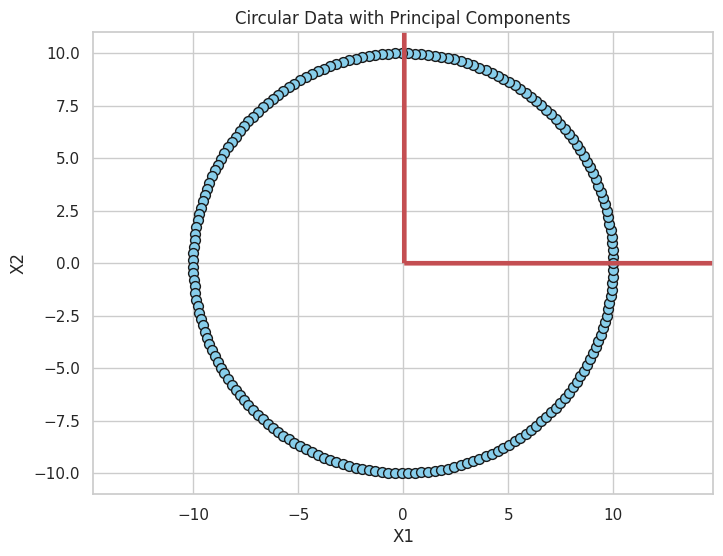

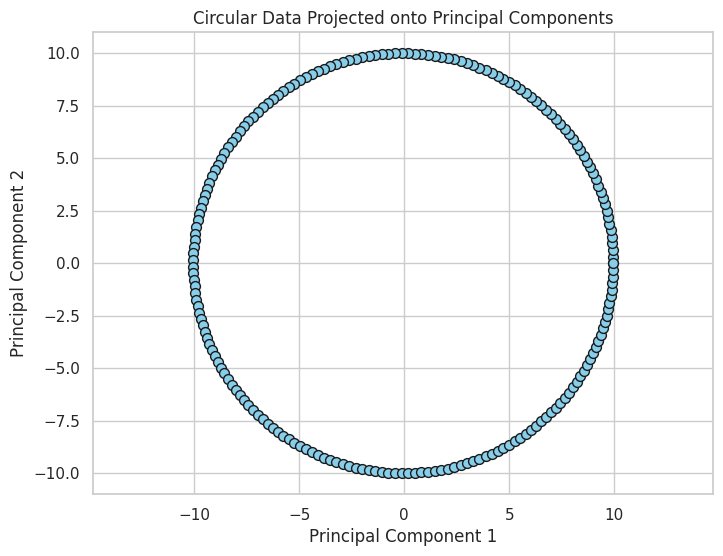

Eigenvalues (Top k) for Circular Data: [50.5 50. ]


In [37]:
k = 2
circle_projected, eigenvalues_circle, eigenvectors_circle = perform_pca(circle_data, k)

# Visualize Circular Data with PCA components
plt.figure(figsize=(8, 6))
plt.scatter(circle_data[:, 0], circle_data[:, 1], color="skyblue", edgecolor="k", s=50)
mean_circle = np.mean(circle_data, axis=0)
for i in range(k):
    plt.quiver(*mean_circle, *eigenvectors_circle[:, i] * eigenvalues_circle[i] * 3, color="r", angles="xy", scale_units="xy", scale=1)
plt.title("Circular Data with Principal Components")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.show()

# Visualize Projected Circular Data based on k
plt.figure(figsize=(8, 6))
if k == 1:
    plt.scatter(circle_projected, np.zeros(circle_projected.shape), color="skyblue", edgecolor="k", s=50)
    plt.ylabel("")
elif k == 2:
    plt.scatter(circle_projected[:, 0], circle_projected[:, 1], color="skyblue", edgecolor="k", s=50)
    plt.ylabel("Principal Component 2")
plt.xlabel("Principal Component 1")
plt.title("Circular Data Projected onto Principal Components")
plt.axis("equal")
plt.show()

print("Eigenvalues (Top k) for Circular Data:", eigenvalues_circle)

In [38]:
x_ellipse = 3 * radius * np.cos(angles) + np.random.normal(0, 0.5, num_points)
y_ellipse = 0.5 * radius * np.sin(angles) + np.random.normal(0, 0.5, num_points)
ellipse_data = np.vstack((x_ellipse, y_ellipse)).T

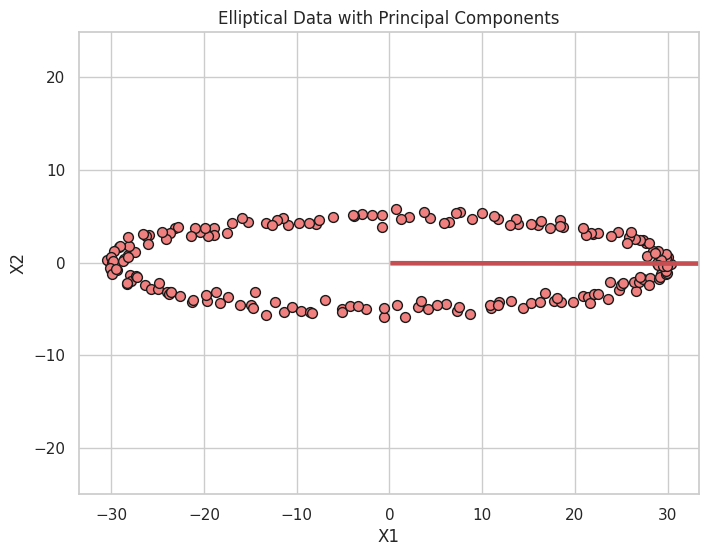

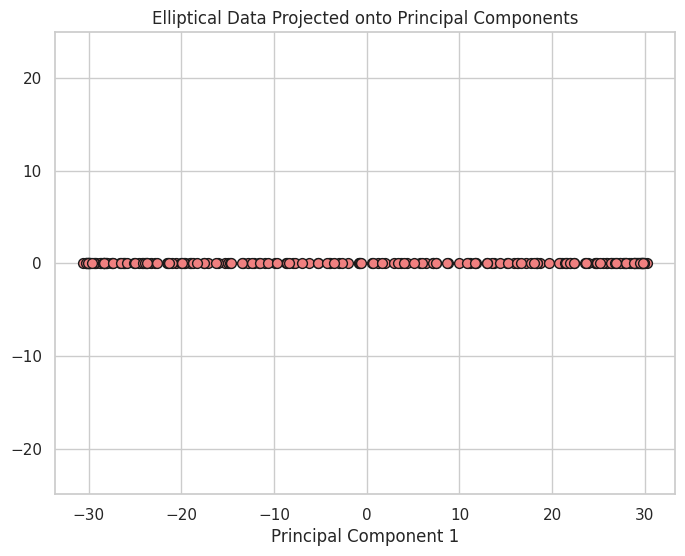

Eigenvalues (Top k) for Elliptical Data: [453.98826786]


In [39]:
k=1
ellipse_projected, eigenvalues_ellipse, eigenvectors_ellipse = perform_pca(ellipse_data, k)

# Visualize Elliptical Data with PCA components
plt.figure(figsize=(8, 6))
plt.scatter(ellipse_data[:, 0], ellipse_data[:, 1], color="lightcoral", edgecolor="k", s=50)
mean_ellipse = np.mean(ellipse_data, axis=0)
for i in range(k):
    plt.quiver(*mean_ellipse, *eigenvectors_ellipse[:, i] * eigenvalues_ellipse[i] * 5, color="r", angles="xy", scale_units="xy", scale=1)
plt.title("Elliptical Data with Principal Components")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.show()

# Visualize Projected Elliptical Data based on k
plt.figure(figsize=(8, 6))
if k == 1:
    plt.scatter(ellipse_projected, np.zeros(ellipse_projected.shape), color="lightcoral", edgecolor="k", s=50)
    plt.ylabel("")
elif k == 2:
    plt.scatter(ellipse_projected[:, 0], ellipse_projected[:, 1], color="lightcoral", edgecolor="k", s=50)
    plt.ylabel("Principal Component 2")
plt.xlabel("Principal Component 1")
plt.title("Elliptical Data Projected onto Principal Components")
plt.axis("equal")
plt.show()

print("Eigenvalues (Top k) for Elliptical Data:", eigenvalues_ellipse)